In [1]:
%pylab inline
import numpy as np
import os
import pickle
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
latest = True
dissfull = True   # If full dissimilarity matrix has been included for clusiVAT partioning.
dataset = ''
metric = ''

f_iVAT = open('GS/latest_VAT.csv','rb')
D_iVAT = np.loadtxt(f_iVAT,delimiter=',')
f_iVAT.close()

f_VAT = open('GS/latest_iVAT.csv','rb')
D_VAT = np.loadtxt(f_VAT,delimiter=',')
f_VAT.close()

f_ind = open('GS/latest_ind.pickle','rb')
I_VAT = pickle.load(f_ind)
f_ind.close()

f_sind = open('GS/latest_sind.pickle','rb')
sampleIndex = pickle.load(f_sind)
f_ind.close()

f_MSTC = open('GS/latest_MSTC.pickle','rb')
C = pickle.load(f_MSTC)
f_MSTC.close()

f_MSTd = open('GS/latest_MSTd.pickle','rb')
d = pickle.load(f_MSTd)
f_MSTd.close()

f_meta = open('GS/latest_meta.pickle','rb')
meta = pickle.load(f_meta)
f_meta.close()

In [3]:
sampleRatio = meta['sample ratio']
metric = meta['metric']

# Imports CSV and creates a time series.
f = "./GS/Sheet1.csv"

dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y %H:%M')

power = pd.read_csv(f, parse_dates=True, index_col='Time', 
                    date_parser=dateparse)
                    
t_ind = power.index                    
days = pd.date_range(start=min(t_ind), end=max(t_ind), freq='D')

for i in power:
    power[i] = pd.to_numeric(power[i], errors=coerce)
    
ts = [power['LOAD #2'][str(j.date())].values for j in days]
ts = np.vstack(tuple(i for i in ts if len(i) == 48))
ts = ts[sampleIndex]

# Array of time series data. This is a poor way of doing it because it means the series must be 
# strorable in memory before being converted to a RDD.
numSeries = len(ts)
numSamples = np.ceil(numSeries * sampleRatio)
lenSeries = len(ts[0])

if sampleRatio != 1.0:
    if len(classes) == len(sampleClasses):
        print 'All classes represented in sampled data.'
    else:
        print 'All classes ARE NOT represented in sampled data.'

## iVAT image and manually selected cluster boundaries

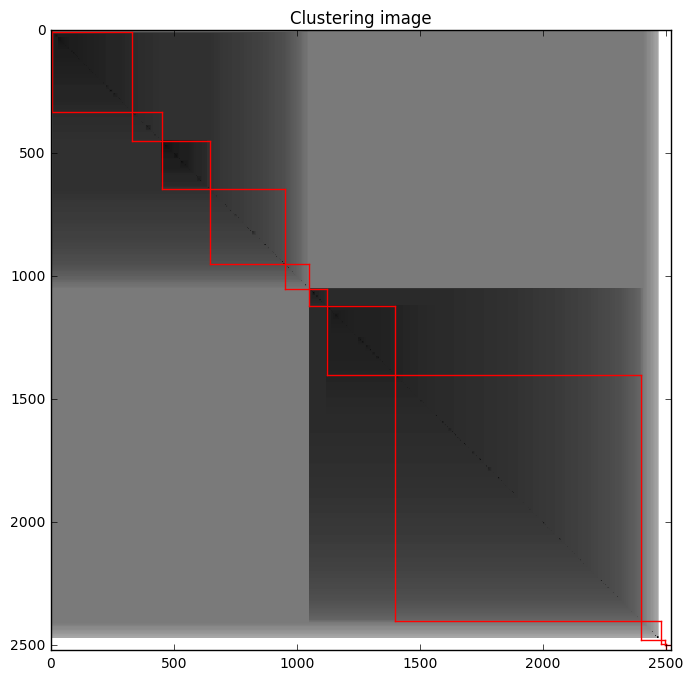

In [33]:
figure(figsize=(8,8))
plt.imshow(D_iVAT[:-50,:-50],cmap='Greys_r',interpolation='none');
plt.title('Clustering image')
s = 0

# Array of iVAT indices separating clusters.
showClusters = True
indices = [5,330,450,645,950,1050,1120,1400,2400,2480,2495,2500]
#indices = [1050,2400]
indices.sort()
numClusters = len(indices)+1
numNoNanSeries = len(D_VAT)

if showClusters:
    for i in range(numClusters-2):
        plt.plot((indices[i], indices[i]), (s,indices[i+1]), 'r-')
        plt.plot((s,indices[i+1]),(indices[i], indices[i]), 'r-')
        s = indices[i]
    plt.plot((indices[-1], indices[-1]), (s, sampleRatio*numNoNanSeries), 'r-')
    plt.plot((s, sampleRatio*numNoNanSeries), (indices[-1], indices[-1]), 'r-')
    plt.axis([0,sampleRatio*numNoNanSeries,sampleRatio*numNoNanSeries,0]);

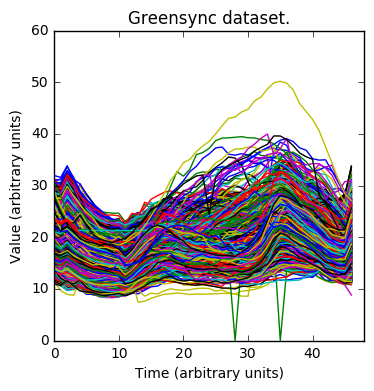

In [34]:
maxval = 60
minval = 0
textpos = minval + 0.85*(maxval -minval)
tsaxlim = [0,lenSeries,minval,maxval]      # Axis limits for time series plot.

figure(figsize=(4,4));
plt.plot(ts[:,1:].T);
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Value (arbitrary units)')
plt.axis(tsaxlim);
plt.title('Greensync dataset.')

## iVAT image and manual partitioning

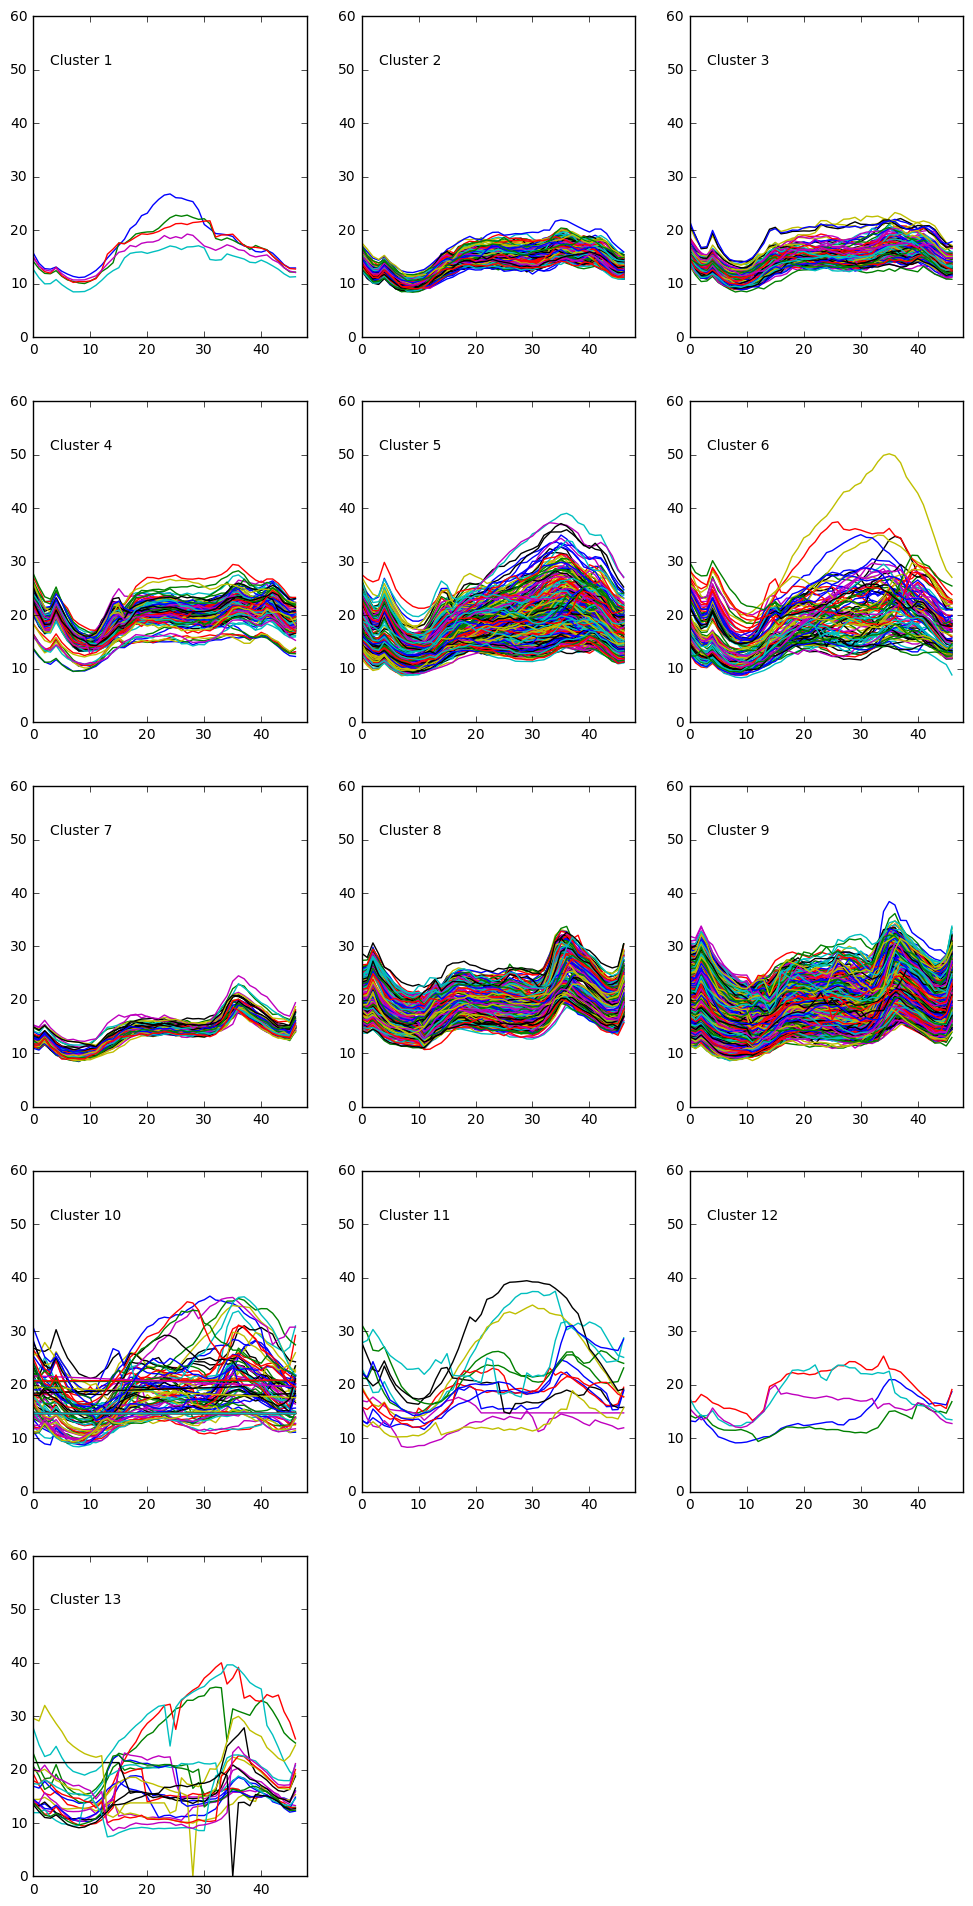

In [35]:
# Plotting configuration options
figcol = 3                        # Number of columns.

figure(figsize=(4*figcol,6*((numClusters+1)/figcol)))
lastClust = 0

for i in range(numClusters-1):
    ax = subplot(numClusters/figcol+1,figcol,i+1)
    plt.plot(ts[I_VAT[lastClust:indices[i]],1:].T)
    lastClust = indices[i]
    ax.text(lenSeries/14,textpos,'Cluster '+str(i+1))
    plt.axis(tsaxlim);
ax = subplot(numClusters/figcol+1,figcol,i+2)
plt.plot(ts[I_VAT[lastClust:],1:].T)
ax.text(lenSeries/14,textpos,'Cluster '+str(i+2))
plt.axis(tsaxlim);